## <center>Prueba 2 Simulación Chimborazo</center>

**Estudiante:** Adriana Castillo

**Personal:** 115

**Camas:** 300

**Respiradores:** 5

**UCI:** 5

**CASOS Iniciales:** 100


### Obtener Media

In [1]:
import pandas as pd
import numpy as np

url = 'Casos.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Chimborazo"]
filtro = df.iloc[0].loc['19/3/2020':]
media = filtro.mean()*3
print(media)

146.9142857142857


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMAS = 300
RESPIRADORES=5
UCI=5
PERSONAL=115

INFECTADOS= 100
TASA_CRECIMIENTO = int(media)
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100

persona_recuperadas={}
persona_fallecidas={}

adultos_femenino=[]
adultos_masculino=[]

mayores_femenino=[]
mayores_masculino=[]

niños_femenino=[]
niños_masculino=[]

niños_femenino_sintomas=[]
niños_masculino_sintomas=[]
niños_femenino_nuemonia=[]
niños_masculino_nuemonia=[]
niños_femenino_cuidados=[]
niños_masculino_cuidados=[]
niños_femenino_fallecidos=[]
niños_masculino_fallecidos=[]
niños_femenino_recuperados=[]
niños_masculino_recuperados=[]

adultos_femeninos_nuemonia=[]
adultos_femeninos_cuidados=[]
adultos_femeninos_fallecidos=[]
adultos_femeninos_recuperados=[]
adultos_masculino_nuemonia=[]
adultos_masculino_cuidados=[]
adultos_masculino_fallecidos=[]
adultos_masculino_recuperados=[]

mayores_femeninos_nuemonia=[]
mayores_femeninos_cuidados=[]
mayores_femeninos_fallecidos=[]
mayores_femeninos_recuperados=[]
mayores_masculino_nuemonia=[]
mayores_masculino_cuidados=[]
mayores_masculino_fallecidos=[]
mayores_masculino_recuperados=[]


class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_uci, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_uci=num_uci
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.uci = simpy.Resource(env, num_uci)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente Nº", paciente, "salió de la hospitalización en el día ", int(self.env.now))
            
    def ucis(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "salió de la UCI en el día ", int(self.env.now))
    
    def medicos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    ##LLEGA MAYOR
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        
        genero= random.randint(1,7)
        if(genero<=3):
            mayores_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_masculino_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                mayores_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Masculino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_masculino_recuperados.append(1)

                                    else:
                                        print("El paciente mayor (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_masculino_fallecidos.append(1)

                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
            
            
        else:
            ##MUJER
            mayores_femenino.append(1)
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_femeninos_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Femenino) Nº", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Femenino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                ##ASIGNAR UCI/RESPIRADOR
                                mayores_femeninos_cuidados.append(1)

                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Femenino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente mayor (Femenino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
        ### LLEGA NIÑO

        genero= random.randint(1,28)
        if(genero<=13):
            niños_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_masculino_sintomas.append(1)

                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_masculino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niño Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niño Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_masculino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niño Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_masculino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_masculino_recuperados.append(1)
                                        else:
                                            print("El paciente niño Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_masculino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_masculino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_masculino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_masculino_recuperados.append(1)

                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_masculino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        else:
            niños_femenino.append(1)
            ##MUJER
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_femenino_sintomas.append(1)
                
                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_femenino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niña Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niña Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_femenino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niña Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_femenino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_femenino_recuperados.append(1)
                                        else:
                                            print("El paciente niña Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_femenino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_femenino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_femenino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_femenino_recuperados.append(1)
                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_femenino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        
    else:
        ##LLEGA ADULTO
        
        genero= random.randint(1,65)
        
        if(genero<=30):
            adultos_masculino.append(1)
            ##HOMBRE  
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_masculino_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Masculino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_masculino_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_masculino_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        else:
            adultos_femenino.append(1)
        ##MUJER
        
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_femeninos_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Femenino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Femenino) Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_femeninos_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Femenino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Femenino) Nº " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos
                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "General Docente",PERSONAL,UCI,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente Nº", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("\t\t\tSimulacion COVID-19 en Hospital General Docente (Chimborazo)\n")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)


			Simulacion COVID-19 en Hospital General Docente (Chimborazo)

Llega el paciente Nº 0  en el día  0
Llega el paciente Nº 1  en el día  0
Llega el paciente Nº 2  en el día  0
Llega el paciente Nº 3  en el día  0
Llega el paciente Nº 4  en el día  0
Llega el paciente Nº 5  en el día  0
Llega el paciente Nº 6  en el día  0
Llega el paciente Nº 7  en el día  0
Llega el paciente Nº 8  en el día  0
Llega el paciente Nº 9  en el día  0
Llega el paciente Nº 10  en el día  0
Llega el paciente Nº 11  en el día  0
Llega el paciente Nº 12  en el día  0
Llega el paciente Nº 13  en el día  0
Llega el paciente Nº 14  en el día  0
Llega el paciente Nº 15  en el día  0
Llega el paciente Nº 16  en el día  0
Llega el paciente Nº 17  en el día  0
Llega el paciente Nº 18  en el día  0
Llega el paciente Nº 19  en el día  0
Llega el paciente Nº 20  en el día  0
Llega el paciente Nº 21  en el día  0
Llega el paciente Nº 22  en el día  0
Llega el paciente Nº 23  en el día  0
Llega el paciente Nº 24  en el dí

Paciente adulto (Masculino) Nº  178  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  179  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  180  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  181  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  182  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  183  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  184  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  186  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  188  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 189  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  190  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  194  se le asigna una cama  hosp

Paciente adulto (Masculino) Nº  379  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 381  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  382  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  383  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  385  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  386  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  388  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  389  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  391  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  392  se le asigna una cama  hospital  General Docente
Llega el paciente Nº 393  en el día  3
Llega el paciente Nº 394  en el día  3
Llega el paciente Nº 395  en el día  3
Llega el paciente Nº 396  en e

Llega el paciente Nº 635  en el día  4
Llega el paciente Nº 636  en el día  4
Llega el paciente Nº 637  en el día  4
Llega el paciente Nº 638  en el día  4
Llega el paciente Nº 639  en el día  4
Llega el paciente Nº 640  en el día  4
Llega el paciente Nº 641  en el día  4
Llega el paciente Nº 642  en el día  4
Llega el paciente Nº 643  en el día  4
Llega el paciente Nº 644  en el día  4
Llega el paciente Nº 645  en el día  4
Llega el paciente Nº 646  en el día  4
Llega el paciente Nº 647  en el día  4
Llega el paciente Nº 648  en el día  4
Llega el paciente Nº 649  en el día  4
Llega el paciente Nº 650  en el día  4
Llega el paciente Nº 651  en el día  4
Llega el paciente Nº 652  en el día  4
Llega el paciente Nº 653  en el día  4
Llega el paciente Nº 654  en el día  4
Llega el paciente Nº 655  en el día  4
Llega el paciente Nº 656  en el día  4
Llega el paciente Nº 657  en el día  4
Llega el paciente Nº 658  en el día  4
Llega el paciente Nº 659  en el día  4
Llega el paciente Nº 660 

Llega el paciente Nº 889  en el día  6
Llega el paciente Nº 890  en el día  6
Llega el paciente Nº 891  en el día  6
Llega el paciente Nº 892  en el día  6
Llega el paciente Nº 893  en el día  6
Llega el paciente Nº 894  en el día  6
Llega el paciente Nº 895  en el día  6
Llega el paciente Nº 896  en el día  6
Llega el paciente Nº 897  en el día  6
Llega el paciente Nº 898  en el día  6
Llega el paciente Nº 899  en el día  6
Llega el paciente Nº 900  en el día  6
Llega el paciente Nº 901  en el día  6
Llega el paciente Nº 902  en el día  6
Llega el paciente Nº 903  en el día  6
Llega el paciente Nº 904  en el día  6
Llega el paciente Nº 905  en el día  6
Llega el paciente Nº 906  en el día  6
Llega el paciente Nº 907  en el día  6
Llega el paciente Nº 908  en el día  6
Llega el paciente Nº 909  en el día  6
Llega el paciente Nº 910  en el día  6
Llega el paciente Nº 911  en el día  6
Llega el paciente Nº 912  en el día  6
Llega el paciente Nº 913  en el día  6
Llega el paciente Nº 914 

Paciente adulto (Femenino) Nº  1121 en el hospital  General Docente se ha recuperado en la etapa Neumonia
El paciente adulto (Femenino) Nº  0  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 11  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 15  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  26  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 54  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  65  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  84  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  101  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  102  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 146  es atendido por e

Llega el paciente Nº 1309  en el día  9
Llega el paciente Nº 1310  en el día  9
Llega el paciente Nº 1311  en el día  9
Llega el paciente Nº 1312  en el día  9
Llega el paciente Nº 1313  en el día  9
Llega el paciente Nº 1314  en el día  9
Llega el paciente Nº 1315  en el día  9
Llega el paciente Nº 1316  en el día  9
Llega el paciente Nº 1317  en el día  9
Llega el paciente Nº 1318  en el día  9
Llega el paciente Nº 1319  en el día  9
Llega el paciente Nº 1320  en el día  9
Llega el paciente Nº 1321  en el día  9
Llega el paciente Nº 1322  en el día  9
Llega el paciente Nº 1323  en el día  9
Llega el paciente Nº 1324  en el día  9
Llega el paciente Nº 1325  en el día  9
Llega el paciente Nº 1326  en el día  9
Llega el paciente Nº 1327  en el día  9
Llega el paciente Nº 1328  en el día  9
Llega el paciente Nº 1329  en el día  9
Llega el paciente Nº 1330  en el día  9
Llega el paciente Nº 1331  en el día  9
Llega el paciente Nº 1332  en el día  9
Llega el paciente Nº 1333  en el día  9


Paciente mayor (Femenino) Nº 485 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 504 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  507 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 514 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  528 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  569 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  577 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 581 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Pa

Paciente Nº 385 salió de la hospitalización en el día  12
Paciente Nº 393 salió de la hospitalización en el día  12
Paciente Nº 403 salió de la hospitalización en el día  12
Paciente Nº 416 salió de la hospitalización en el día  12
Paciente Nº 432 salió de la hospitalización en el día  12
Paciente Nº 439 salió de la hospitalización en el día  12
Paciente Nº 464 salió de la hospitalización en el día  12
Paciente Nº 467 salió de la hospitalización en el día  12
Paciente Nº 98 finalizó su atención con el personal el día  12
Llega el paciente Nº 1707  en el día  12
Llega el paciente Nº 1708  en el día  12
Llega el paciente Nº 1709  en el día  12
Llega el paciente Nº 1710  en el día  12
Llega el paciente Nº 1711  en el día  12
Llega el paciente Nº 1712  en el día  12
Llega el paciente Nº 1713  en el día  12
Llega el paciente Nº 1714  en el día  12
Llega el paciente Nº 1715  en el día  12
Llega el paciente Nº 1716  en el día  12
Llega el paciente Nº 1717  en el día  12
Llega el paciente Nº 1

Llega el paciente Nº 1984  en el día  13
Llega el paciente Nº 1985  en el día  13
Llega el paciente Nº 1986  en el día  13
Llega el paciente Nº 1987  en el día  13
Llega el paciente Nº 1988  en el día  13
Llega el paciente Nº 1989  en el día  13
Llega el paciente Nº 1990  en el día  13
Llega el paciente Nº 1991  en el día  13
Llega el paciente Nº 1992  en el día  13
Llega el paciente Nº 1993  en el día  13
Llega el paciente Nº 1994  en el día  13
Llega el paciente Nº 1995  en el día  13
Llega el paciente Nº 1996  en el día  13
Llega el paciente Nº 1997  en el día  13
Llega el paciente Nº 1998  en el día  13
Paciente adulto (Masculino) Nº 1853 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1854 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 1855 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1858 en el hospital  General Docente se ha recuperado en la etap

Llega el paciente Nº 2131  en el día  14
Llega el paciente Nº 2132  en el día  14
Llega el paciente Nº 2133  en el día  14
Llega el paciente Nº 2134  en el día  14
Llega el paciente Nº 2135  en el día  14
Llega el paciente Nº 2136  en el día  14
Llega el paciente Nº 2137  en el día  14
Llega el paciente Nº 2138  en el día  14
Llega el paciente Nº 2139  en el día  14
Llega el paciente Nº 2140  en el día  14
Llega el paciente Nº 2141  en el día  14
Llega el paciente Nº 2142  en el día  14
Llega el paciente Nº 2143  en el día  14
Llega el paciente Nº 2144  en el día  14
Paciente adulto (Masculino) Nº 1999 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 2000 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2002 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 2010 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº 

Paciente adulto (Masculino) Nº 1379 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1413 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1475 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1496 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1514 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1543 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1558 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 79 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Pac

Llega el paciente Nº 2473  en el día  17
Llega el paciente Nº 2474  en el día  17
Llega el paciente Nº 2475  en el día  17
Llega el paciente Nº 2476  en el día  17
Llega el paciente Nº 2477  en el día  17
Llega el paciente Nº 2478  en el día  17
Llega el paciente Nº 2479  en el día  17
Llega el paciente Nº 2480  en el día  17
Llega el paciente Nº 2481  en el día  17
Llega el paciente Nº 2482  en el día  17
Llega el paciente Nº 2483  en el día  17
Llega el paciente Nº 2484  en el día  17
Llega el paciente Nº 2485  en el día  17
Llega el paciente Nº 2486  en el día  17
Llega el paciente Nº 2487  en el día  17
Llega el paciente Nº 2488  en el día  17
Llega el paciente Nº 2489  en el día  17
Llega el paciente Nº 2490  en el día  17
Llega el paciente Nº 2491  en el día  17
Llega el paciente Nº 2492  en el día  17
Llega el paciente Nº 2493  en el día  17
Llega el paciente Nº 2494  en el día  17
Llega el paciente Nº 2495  en el día  17
Llega el paciente Nº 2496  en el día  17
Llega el pacient

Llega el paciente Nº 2610  en el día  18
Llega el paciente Nº 2611  en el día  18
Llega el paciente Nº 2612  en el día  18
Llega el paciente Nº 2613  en el día  18
Llega el paciente Nº 2614  en el día  18
Llega el paciente Nº 2615  en el día  18
Llega el paciente Nº 2616  en el día  18
Llega el paciente Nº 2617  en el día  18
Llega el paciente Nº 2618  en el día  18
Llega el paciente Nº 2619  en el día  18
Llega el paciente Nº 2620  en el día  18
Llega el paciente Nº 2621  en el día  18
Llega el paciente Nº 2622  en el día  18
Llega el paciente Nº 2623  en el día  18
Llega el paciente Nº 2624  en el día  18
Llega el paciente Nº 2625  en el día  18
Llega el paciente Nº 2626  en el día  18
Llega el paciente Nº 2627  en el día  18
Llega el paciente Nº 2628  en el día  18
Llega el paciente Nº 2629  en el día  18
Llega el paciente Nº 2630  en el día  18
Llega el paciente Nº 2631  en el día  18
Llega el paciente Nº 2632  en el día  18
Llega el paciente Nº 2633  en el día  18
Llega el pacient

Paciente adulto (Femenino) Nº  2735 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2736 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2739 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  2742 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2744 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 2746 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2750 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2752 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 2754 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2755 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente n

Paciente mayor (Femenino) Nº 1281 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1287 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1294 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1297 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1313 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1315 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1366 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1368 en el hospital  General Docente  espero  11  dias y fallece por falta de acce

Paciente adulto (Femenino) Nº  2200 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2213 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2214 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2236 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2259 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2286 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2303 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2339 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  1741 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1744 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1762 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1772 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1776 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1783 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1788 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1801 en el hospital  General Docente  espero  10  dias y fallece por falta de ac

Paciente adulto (Femenino) Nº  1532  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  1536  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  1560  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  1566  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  1580  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  1588  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  1594  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  1600  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  1605  se le asigna una cama  hospital  General Docente
Paciente Nº 60 finalizó su atención con el personal el día  24
Paciente Nº 212 finalizó su atención con el personal el día  24
Paciente Nº 225 finalizó su atención con el personal el día  24
Paciente Nº 182 finalizó su ate

Paciente Nº 898 salió de la hospitalización en el día  25
Paciente Nº 903 salió de la hospitalización en el día  25
Paciente Nº 924 salió de la hospitalización en el día  25
Paciente Nº 991 salió de la hospitalización en el día  25
Paciente Nº 994 salió de la hospitalización en el día  25
Paciente Nº 1013 salió de la hospitalización en el día  25
Paciente Nº 1035 salió de la hospitalización en el día  25
Paciente Nº 1134 salió de la hospitalización en el día  25
Llega el paciente Nº 3605  en el día  25
Llega el paciente Nº 3606  en el día  25
Llega el paciente Nº 3607  en el día  25
Llega el paciente Nº 3608  en el día  25
Llega el paciente Nº 3609  en el día  25
Llega el paciente Nº 3610  en el día  25
Llega el paciente Nº 3611  en el día  25
Llega el paciente Nº 3612  en el día  25
Llega el paciente Nº 3613  en el día  25
Llega el paciente Nº 3614  en el día  25
Llega el paciente Nº 3615  en el día  25
Llega el paciente Nº 3616  en el día  25
Llega el paciente Nº 3617  en el día  25


Paciente Nº 562 salió de la hospitalización en el día  26
Paciente Nº 565 salió de la hospitalización en el día  26
Paciente Nº 622 salió de la hospitalización en el día  26
Paciente Nº 633 salió de la hospitalización en el día  26
Paciente Nº 677 salió de la hospitalización en el día  26
Paciente Nº 712 salió de la hospitalización en el día  26
Paciente Nº 721 salió de la hospitalización en el día  26
Paciente Nº 774 salió de la hospitalización en el día  26
Paciente Nº 779 salió de la hospitalización en el día  26
Paciente Nº 855 salió de la hospitalización en el día  26
Paciente Nº 873 salió de la hospitalización en el día  26
Paciente Nº 881 salió de la hospitalización en el día  26
Paciente Nº 888 salió de la hospitalización en el día  26
Paciente Nº 908 salió de la hospitalización en el día  26
Paciente Nº 919 salió de la hospitalización en el día  26
Paciente Nº 1074 salió de la hospitalización en el día  26
Paciente Nº 1154 salió de la hospitalización en el día  26
Paciente Nº 

Llega el paciente Nº 3915  en el día  27
Llega el paciente Nº 3916  en el día  27
Llega el paciente Nº 3917  en el día  27
Llega el paciente Nº 3918  en el día  27
Llega el paciente Nº 3919  en el día  27
Llega el paciente Nº 3920  en el día  27
Llega el paciente Nº 3921  en el día  27
Llega el paciente Nº 3922  en el día  27
Llega el paciente Nº 3923  en el día  27
Llega el paciente Nº 3924  en el día  27
Llega el paciente Nº 3925  en el día  27
Llega el paciente Nº 3926  en el día  27
Llega el paciente Nº 3927  en el día  27
Llega el paciente Nº 3928  en el día  27
Llega el paciente Nº 3929  en el día  27
Llega el paciente Nº 3930  en el día  27
Llega el paciente Nº 3931  en el día  27
Llega el paciente Nº 3932  en el día  27
Llega el paciente Nº 3933  en el día  27
Llega el paciente Nº 3934  en el día  27
Llega el paciente Nº 3935  en el día  27
Llega el paciente Nº 3936  en el día  27
Llega el paciente Nº 3937  en el día  27
Llega el paciente Nº 3938  en el día  27
Llega el pacient

El paciente adulto (Femenino) Nº  779  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  2017  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  2060  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  919  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  2069  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  1231  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  2075  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  2084  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  2090  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  2094  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  2096  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculin

Paciente Nº 1186 salió de la hospitalización en el día  29
Paciente Nº 1256 salió de la hospitalización en el día  29
Paciente Nº 1305 salió de la hospitalización en el día  29
Paciente Nº 1417 salió de la hospitalización en el día  29
Paciente Nº 1419 salió de la hospitalización en el día  29
Paciente Nº 1520 salió de la hospitalización en el día  29
Paciente Nº 1560 salió de la hospitalización en el día  29
Paciente Nº 1626 salió de la hospitalización en el día  29
Llega el paciente Nº 4189  en el día  29
Llega el paciente Nº 4190  en el día  29
Llega el paciente Nº 4191  en el día  29
Llega el paciente Nº 4192  en el día  29
Llega el paciente Nº 4193  en el día  29
Llega el paciente Nº 4194  en el día  29
Llega el paciente Nº 4195  en el día  29
Llega el paciente Nº 4196  en el día  29
Llega el paciente Nº 4197  en el día  29
Llega el paciente Nº 4198  en el día  29
Llega el paciente Nº 4199  en el día  29
Llega el paciente Nº 4200  en el día  29
Llega el paciente Nº 4201  en el día

Llega el paciente Nº 4391  en el día  30
Llega el paciente Nº 4392  en el día  30
Llega el paciente Nº 4393  en el día  30
Llega el paciente Nº 4394  en el día  30
Llega el paciente Nº 4395  en el día  30
Llega el paciente Nº 4396  en el día  30
Llega el paciente Nº 4397  en el día  30
Llega el paciente Nº 4398  en el día  30
Llega el paciente Nº 4399  en el día  30
Llega el paciente Nº 4400  en el día  30
Llega el paciente Nº 4401  en el día  30
Llega el paciente Nº 4402  en el día  30
Llega el paciente Nº 4403  en el día  30
Llega el paciente Nº 4404  en el día  30
Llega el paciente Nº 4405  en el día  30
Llega el paciente Nº 4406  en el día  30
Llega el paciente Nº 4407  en el día  30
Llega el paciente Nº 4408  en el día  30
Llega el paciente Nº 4409  en el día  30
Llega el paciente Nº 4410  en el día  30
Llega el paciente Nº 4411  en el día  30
Llega el paciente Nº 4412  en el día  30
Llega el paciente Nº 4413  en el día  30
Llega el paciente Nº 4414  en el día  30
Llega el pacient

Llega el paciente Nº 4591  en el día  31
Llega el paciente Nº 4592  en el día  31
Llega el paciente Nº 4593  en el día  31
Llega el paciente Nº 4594  en el día  31
Llega el paciente Nº 4595  en el día  31
Llega el paciente Nº 4596  en el día  31
Llega el paciente Nº 4597  en el día  31
Llega el paciente Nº 4598  en el día  31
Llega el paciente Nº 4599  en el día  31
Llega el paciente Nº 4600  en el día  31
Llega el paciente Nº 4601  en el día  31
Llega el paciente Nº 4602  en el día  31
Llega el paciente Nº 4603  en el día  31
Llega el paciente Nº 4604  en el día  31
Llega el paciente Nº 4605  en el día  31
Llega el paciente Nº 4606  en el día  31
Llega el paciente Nº 4607  en el día  31
Llega el paciente Nº 4608  en el día  31
Llega el paciente Nº 4609  en el día  31
Llega el paciente Nº 4610  en el día  31
Llega el paciente Nº 4611  en el día  31
Llega el paciente Nº 4612  en el día  31
Llega el paciente Nº 4613  en el día  31
Llega el paciente Nº 4614  en el día  31
Llega el pacient

Llega el paciente Nº 4735  en el día  32
Llega el paciente Nº 4736  en el día  32
Llega el paciente Nº 4737  en el día  32
Llega el paciente Nº 4738  en el día  32
Llega el paciente Nº 4739  en el día  32
Llega el paciente Nº 4740  en el día  32
Llega el paciente Nº 4741  en el día  32
Llega el paciente Nº 4742  en el día  32
Llega el paciente Nº 4743  en el día  32
Llega el paciente Nº 4744  en el día  32
Llega el paciente Nº 4745  en el día  32
Llega el paciente Nº 4746  en el día  32
Llega el paciente Nº 4747  en el día  32
Llega el paciente Nº 4748  en el día  32
Llega el paciente Nº 4749  en el día  32
Llega el paciente Nº 4750  en el día  32
Llega el paciente Nº 4751  en el día  32
Llega el paciente Nº 4752  en el día  32
Llega el paciente Nº 4753  en el día  32
Llega el paciente Nº 4754  en el día  32
Llega el paciente Nº 4755  en el día  32
Llega el paciente Nº 4756  en el día  32
Llega el paciente Nº 4757  en el día  32
Llega el paciente Nº 4758  en el día  32
Llega el pacient

Llega el paciente Nº 4903  en el día  33
Llega el paciente Nº 4904  en el día  33
Llega el paciente Nº 4905  en el día  33
Llega el paciente Nº 4906  en el día  33
Llega el paciente Nº 4907  en el día  33
Llega el paciente Nº 4908  en el día  33
Llega el paciente Nº 4909  en el día  33
Llega el paciente Nº 4910  en el día  33
Llega el paciente Nº 4911  en el día  33
Llega el paciente Nº 4912  en el día  33
Llega el paciente Nº 4913  en el día  33
Llega el paciente Nº 4914  en el día  33
Llega el paciente Nº 4915  en el día  33
Llega el paciente Nº 4916  en el día  33
Llega el paciente Nº 4917  en el día  33
Llega el paciente Nº 4918  en el día  33
Paciente niña Nº 4773 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 4775 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 4776 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 4778 en el hospital  General Docente se ha recupera

Paciente adulto (Masculino) Nº 5050 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5052 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5053 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5054 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5061 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5063 en el hospital  General Docente se ha recuperado en la etapa Neumonia
El paciente adulto (Femenino) Nº  457  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 3075 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3093 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  621 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3462 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3556 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3564 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3599 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
El paciente adulto (Masculino) Nº 345  en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  3605 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 3624 en el hospital  General Docente  espero  10  dias y fallece por falta

Paciente adulto (Femenino) Nº  3998 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4008 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4042 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4060 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4085 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4101 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4125 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4127 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  4673 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4692 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 4715 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 4720 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4722 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 4725 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 4743 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4747 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a u

Llega el paciente Nº 5667  en el día  39
Llega el paciente Nº 5668  en el día  39
Llega el paciente Nº 5669  en el día  39
Llega el paciente Nº 5670  en el día  39
Llega el paciente Nº 5671  en el día  39
Llega el paciente Nº 5672  en el día  39
Llega el paciente Nº 5673  en el día  39
Llega el paciente Nº 5674  en el día  39
Llega el paciente Nº 5675  en el día  39
Llega el paciente Nº 5676  en el día  39
Llega el paciente Nº 5677  en el día  39
Llega el paciente Nº 5678  en el día  39
Llega el paciente Nº 5679  en el día  39
Llega el paciente Nº 5680  en el día  39
Llega el paciente Nº 5681  en el día  39
Llega el paciente Nº 5682  en el día  39
Llega el paciente Nº 5683  en el día  39
Llega el paciente Nº 5684  en el día  39
Llega el paciente Nº 5685  en el día  39
Llega el paciente Nº 5686  en el día  39
Llega el paciente Nº 5687  en el día  39
Llega el paciente Nº 5688  en el día  39
Llega el paciente Nº 5689  en el día  39
Llega el paciente Nº 5690  en el día  39
Llega el pacient

Llega el paciente Nº 5927  en el día  40
Llega el paciente Nº 5928  en el día  40
Llega el paciente Nº 5929  en el día  40
Llega el paciente Nº 5930  en el día  40
Llega el paciente Nº 5931  en el día  40
Llega el paciente Nº 5932  en el día  40
Llega el paciente Nº 5933  en el día  40
Llega el paciente Nº 5934  en el día  40
Llega el paciente Nº 5935  en el día  40
Llega el paciente Nº 5936  en el día  40
Llega el paciente Nº 5937  en el día  40
Llega el paciente Nº 5938  en el día  40
Llega el paciente Nº 5939  en el día  40
Llega el paciente Nº 5940  en el día  40
Paciente niña Nº 5796 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 5798 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5802 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 5804 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5807 en el hospital  Genera

Paciente adulto (Femenino) Nº  5986 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5990 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5992 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5996 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5997 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5999 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 6000 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 6001 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente mayor (Femenino) Nº 6002 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 6003 en el hospital  General Docente se ha recuperado en la etapa Neumoni

Paciente adulto (Femenino) Nº  644 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  888  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 1263  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  4162 en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4171 en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a una cama
El paciente adulto (Femenino) Nº  370  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  701  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 4192 en el hos

Paciente adulto (Masculino) Nº 4811 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4824 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4843 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4861 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente niña Nº 4909 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4914 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1003 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4952 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente 

Paciente adulto (Femenino) Nº  5166 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5169 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5171 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5177 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5180 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5205 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5212 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5222 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  5167 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5181 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5197 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5206 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5233 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5238 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5269 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5285 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso

Paciente adulto (Femenino) Nº  3472 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3910 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Masculino) Nº  1396 accede a la UCI y se le asigna un respirador hospital  General Docente
El paciente adulto (Femenino) Nº  2460  es atendido por el personal  hospital  General Docente
El paciente mayor (Femenino) Nº 2709  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  4806  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 3026  es atendido por el personal  hospital  General Docente
Paciente mayor (Femenino) Nº 4815  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 3033  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  4822  se le asigna una cama  hospital  General Docente
Paciente adulto (Fem

Paciente adulto (Masculino) Nº  5081  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5084  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 4149  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 2796  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  2893  es atendido por el personal  hospital  General Docente
Paciente Nº 2979 salió de la hospitalización en el día  48
Paciente Nº 3074 salió de la hospitalización en el día  48
Paciente Nº 3228 salió de la hospitalización en el día  48
Paciente Nº 3350 salió de la hospitalización en el día  48
Paciente Nº 3463 salió de la hospitalización en el día  48
Paciente Nº 3531 salió de la hospitalización en el día  48
Paciente Nº 3555 salió de la hospitalización en el día  48
Paciente Nº 3573 salió de la hospitalización en el día  48
Paciente Nº 3761 salió de la hospitalización en el día  48
Paciente N

Llega el paciente Nº 7161  en el día  49
Llega el paciente Nº 7162  en el día  49
Llega el paciente Nº 7163  en el día  49
Llega el paciente Nº 7164  en el día  49
Llega el paciente Nº 7165  en el día  49
Llega el paciente Nº 7166  en el día  49
Llega el paciente Nº 7167  en el día  49
Llega el paciente Nº 7168  en el día  49
Llega el paciente Nº 7169  en el día  49
Llega el paciente Nº 7170  en el día  49
Llega el paciente Nº 7171  en el día  49
Llega el paciente Nº 7172  en el día  49
Llega el paciente Nº 7173  en el día  49
Llega el paciente Nº 7174  en el día  49
Llega el paciente Nº 7175  en el día  49
Llega el paciente Nº 7176  en el día  49
Llega el paciente Nº 7177  en el día  49
Llega el paciente Nº 7178  en el día  49
Llega el paciente Nº 7179  en el día  49
Llega el paciente Nº 7180  en el día  49
Llega el paciente Nº 7181  en el día  49
Llega el paciente Nº 7182  en el día  49
Llega el paciente Nº 7183  en el día  49
Llega el paciente Nº 7184  en el día  49
Llega el pacient

Llega el paciente Nº 7380  en el día  50
Llega el paciente Nº 7381  en el día  50
Llega el paciente Nº 7382  en el día  50
Llega el paciente Nº 7383  en el día  50
Llega el paciente Nº 7384  en el día  50
Llega el paciente Nº 7385  en el día  50
Llega el paciente Nº 7386  en el día  50
Llega el paciente Nº 7387  en el día  50
Llega el paciente Nº 7388  en el día  50
Llega el paciente Nº 7389  en el día  50
Llega el paciente Nº 7390  en el día  50
Llega el paciente Nº 7391  en el día  50
Llega el paciente Nº 7392  en el día  50
Llega el paciente Nº 7393  en el día  50
Llega el paciente Nº 7394  en el día  50
Llega el paciente Nº 7395  en el día  50
Llega el paciente Nº 7396  en el día  50
Llega el paciente Nº 7397  en el día  50
Llega el paciente Nº 7398  en el día  50
Llega el paciente Nº 7399  en el día  50
Llega el paciente Nº 7400  en el día  50
Paciente niña Nº 7263 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 7265 en el hospi

Paciente adulto (Femenino) Nº  7538 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  7539 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 7540 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 7541 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7543 en el hospital  General Docente se ha recuperado en la etapa Sintomas
El paciente adulto (Femenino) Nº  1250  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente mayor (Masculino) Nº 2111  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  2475  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  5476 en el hospital  General Docente  esp

Paciente adulto (Masculino) Nº 6281 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 6368 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6373 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 6375 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6382 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6398 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6401 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6442 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una c

Paciente adulto (Masculino) Nº 3547 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3738 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3909 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4131 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4489 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  5839  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5841  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5882  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5884  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5885  se le asigna una cama  hospital

Llega el paciente Nº 8045  en el día  55
Llega el paciente Nº 8046  en el día  55
Llega el paciente Nº 8047  en el día  55
Llega el paciente Nº 8048  en el día  55
Llega el paciente Nº 8049  en el día  55
Llega el paciente Nº 8050  en el día  55
Llega el paciente Nº 8051  en el día  55
Llega el paciente Nº 8052  en el día  55
Llega el paciente Nº 8053  en el día  55
Llega el paciente Nº 8054  en el día  55
Llega el paciente Nº 8055  en el día  55
Llega el paciente Nº 8056  en el día  55
Llega el paciente Nº 8057  en el día  55
Llega el paciente Nº 8058  en el día  55
Llega el paciente Nº 8059  en el día  55
Llega el paciente Nº 8060  en el día  55
Llega el paciente Nº 8061  en el día  55
Llega el paciente Nº 8062  en el día  55
Llega el paciente Nº 8063  en el día  55
Llega el paciente Nº 8064  en el día  55
Llega el paciente Nº 8065  en el día  55
Llega el paciente Nº 8066  en el día  55
Llega el paciente Nº 8067  en el día  55
Llega el paciente Nº 8068  en el día  55
Llega el pacient

Llega el paciente Nº 8205  en el día  56
Llega el paciente Nº 8206  en el día  56
Llega el paciente Nº 8207  en el día  56
Llega el paciente Nº 8208  en el día  56
Llega el paciente Nº 8209  en el día  56
Llega el paciente Nº 8210  en el día  56
Llega el paciente Nº 8211  en el día  56
Llega el paciente Nº 8212  en el día  56
Llega el paciente Nº 8213  en el día  56
Llega el paciente Nº 8214  en el día  56
Llega el paciente Nº 8215  en el día  56
Llega el paciente Nº 8216  en el día  56
Llega el paciente Nº 8217  en el día  56
Llega el paciente Nº 8218  en el día  56
Llega el paciente Nº 8219  en el día  56
Llega el paciente Nº 8220  en el día  56
Llega el paciente Nº 8221  en el día  56
Llega el paciente Nº 8222  en el día  56
Llega el paciente Nº 8223  en el día  56
Llega el paciente Nº 8224  en el día  56
Llega el paciente Nº 8225  en el día  56
Llega el paciente Nº 8226  en el día  56
Llega el paciente Nº 8227  en el día  56
Llega el paciente Nº 8228  en el día  56
Llega el pacient

Paciente adulto (Masculino) Nº 8365 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  8371 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 8374 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 8375 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  8377 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 8378 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 8379 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 8380 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  8381 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  8385 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente a

Paciente adulto (Masculino) Nº 7033 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7038 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7057 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7061 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7064 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7065 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  7091 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7106 en el hospital  General Docente  espero  10  dias y fallece por falta de ac

Paciente adulto (Masculino) Nº 8689 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 8690 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 8692 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 8694 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 8695 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 8697 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 8699 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 8703 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  8705 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  8706 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 8708 en

Paciente adulto (Masculino) Nº 7530 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7532 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7544 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente niño Nº 7560 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7575 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7579 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7621 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7632 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Pacien

Paciente adulto (Femenino) Nº  8204 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8224 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8252 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 8257 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 5115 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 5449 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  5801 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 5885 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº

Llega el paciente Nº 9170  en el día  63
Llega el paciente Nº 9171  en el día  63
Llega el paciente Nº 9172  en el día  63
Llega el paciente Nº 9173  en el día  63
Llega el paciente Nº 9174  en el día  63
Llega el paciente Nº 9175  en el día  63
Llega el paciente Nº 9176  en el día  63
Llega el paciente Nº 9177  en el día  63
Llega el paciente Nº 9178  en el día  63
Llega el paciente Nº 9179  en el día  63
Llega el paciente Nº 9180  en el día  63
Llega el paciente Nº 9181  en el día  63
Llega el paciente Nº 9182  en el día  63
Llega el paciente Nº 9183  en el día  63
Llega el paciente Nº 9184  en el día  63
Llega el paciente Nº 9185  en el día  63
Llega el paciente Nº 9186  en el día  63
Llega el paciente Nº 9187  en el día  63
Llega el paciente Nº 9188  en el día  63
Llega el paciente Nº 9189  en el día  63
Llega el paciente Nº 9190  en el día  63
Llega el paciente Nº 9191  en el día  63
Llega el paciente Nº 9192  en el día  63
Llega el paciente Nº 9193  en el día  63
Llega el pacient

Llega el paciente Nº 9352  en el día  64
Llega el paciente Nº 9353  en el día  64
Llega el paciente Nº 9354  en el día  64
Llega el paciente Nº 9355  en el día  64
Llega el paciente Nº 9356  en el día  64
Llega el paciente Nº 9357  en el día  64
Llega el paciente Nº 9358  en el día  64
Llega el paciente Nº 9359  en el día  64
Llega el paciente Nº 9360  en el día  64
Llega el paciente Nº 9361  en el día  64
Llega el paciente Nº 9362  en el día  64
Llega el paciente Nº 9363  en el día  64
Llega el paciente Nº 9364  en el día  64
Llega el paciente Nº 9365  en el día  64
Llega el paciente Nº 9366  en el día  64
Llega el paciente Nº 9367  en el día  64
Llega el paciente Nº 9368  en el día  64
Llega el paciente Nº 9369  en el día  64
Llega el paciente Nº 9370  en el día  64
Llega el paciente Nº 9371  en el día  64
Llega el paciente Nº 9372  en el día  64
Llega el paciente Nº 9373  en el día  64
Llega el paciente Nº 9374  en el día  64
Llega el paciente Nº 9375  en el día  64
Llega el pacient

Paciente adulto (Femenino) Nº  9507 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9512 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9517 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9518 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9519 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9524 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9527 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9531 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9532 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9534 en el hospital  General Docente se ha 

El paciente adulto (Masculino) Nº 4455  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente mayor (Femenino) Nº 4412  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  4458  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  4898  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 7725 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7756 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7786 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  77

Paciente adulto (Femenino) Nº  7898 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7931 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7933 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7965 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 7975 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 8004 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8005 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  8006 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso

Paciente adulto (Femenino) Nº  8141  se le asigna una cama  hospital  General Docente
Paciente mayor (Masculino) Nº  8144  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  8148  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  8149  se le asigna una cama  hospital  General Docente
Paciente Nº 4355 finalizó su atención con el personal el día  69
Paciente Nº 6160 salió de la hospitalización en el día  69
Paciente Nº 4077 finalizó su atención con el personal el día  69
Paciente Nº 6413 salió de la hospitalización en el día  69
Paciente Nº 6434 salió de la hospitalización en el día  69
Paciente Nº 6496 salió de la hospitalización en el día  69
Paciente Nº 6534 salió de la hospitalización en el día  69
Paciente Nº 4532 finalizó su atención con el personal el día  69
Paciente Nº 6588 salió de la hospitalización en el día  69
Paciente Nº 6650 salió de la hospitalización en el día  69
Paciente Nº 6703 salió de la hospitalización en

Llega el paciente Nº 10273  en el día  70
Llega el paciente Nº 10274  en el día  70
Llega el paciente Nº 10275  en el día  70
Llega el paciente Nº 10276  en el día  70
Llega el paciente Nº 10277  en el día  70
Llega el paciente Nº 10278  en el día  70
Llega el paciente Nº 10279  en el día  70
Llega el paciente Nº 10280  en el día  70
Llega el paciente Nº 10281  en el día  70
Llega el paciente Nº 10282  en el día  70
Llega el paciente Nº 10283  en el día  70
Llega el paciente Nº 10284  en el día  70
Llega el paciente Nº 10285  en el día  70
Llega el paciente Nº 10286  en el día  70
Llega el paciente Nº 10287  en el día  70
Llega el paciente Nº 10288  en el día  70
Llega el paciente Nº 10289  en el día  70
Llega el paciente Nº 10290  en el día  70
Llega el paciente Nº 10291  en el día  70
Llega el paciente Nº 10292  en el día  70
Llega el paciente Nº 10293  en el día  70
Llega el paciente Nº 10294  en el día  70
Llega el paciente Nº 10295  en el día  70
Llega el paciente Nº 10296  en el 

Llega el paciente Nº 10463  en el día  71
Llega el paciente Nº 10464  en el día  71
Llega el paciente Nº 10465  en el día  71
Llega el paciente Nº 10466  en el día  71
Paciente niño Nº 10324 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10327 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10328 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 10330 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10333 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10334 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10336 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10338 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1

Paciente niña Nº 10502 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10504 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10506 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10507 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10508 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10509 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10512 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10515 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10516 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10519 en el hospital  General Docente se ha recuperado en la etapa Neumonia


Paciente mayor (Femenino) Nº 10741 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10744 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10745 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10746 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10754 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 10757 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10758 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  8668 en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a una cama
El paciente adulto (Masculino) Nº 4495  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (F

Paciente adulto (Masculino) Nº 9777 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9780 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9791 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9826 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9865 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9881 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5895 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  9911 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
P

Paciente mayor (Masculino) Nº 9966 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  9982 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10010 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10058 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10165 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10188 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10192 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 10222 en el hospital  General Docente  espero  5  dias y fallece por falta de acce

Llega el paciente Nº 11202  en el día  77
Llega el paciente Nº 11203  en el día  77
Llega el paciente Nº 11204  en el día  77
Llega el paciente Nº 11205  en el día  77
Llega el paciente Nº 11206  en el día  77
Llega el paciente Nº 11207  en el día  77
Llega el paciente Nº 11208  en el día  77
Llega el paciente Nº 11209  en el día  77
Llega el paciente Nº 11210  en el día  77
Llega el paciente Nº 11211  en el día  77
Llega el paciente Nº 11212  en el día  77
Llega el paciente Nº 11213  en el día  77
Llega el paciente Nº 11214  en el día  77
Llega el paciente Nº 11215  en el día  77
Llega el paciente Nº 11216  en el día  77
Llega el paciente Nº 11217  en el día  77
Llega el paciente Nº 11218  en el día  77
Llega el paciente Nº 11219  en el día  77
Llega el paciente Nº 11220  en el día  77
Llega el paciente Nº 11221  en el día  77
Llega el paciente Nº 11222  en el día  77
Llega el paciente Nº 11223  en el día  77
Llega el paciente Nº 11224  en el día  77
Llega el paciente Nº 11225  en el 

Llega el paciente Nº 11403  en el día  78
Llega el paciente Nº 11404  en el día  78
Llega el paciente Nº 11405  en el día  78
Llega el paciente Nº 11406  en el día  78
Llega el paciente Nº 11407  en el día  78
Llega el paciente Nº 11408  en el día  78
Llega el paciente Nº 11409  en el día  78
Llega el paciente Nº 11410  en el día  78
Llega el paciente Nº 11411  en el día  78
Llega el paciente Nº 11412  en el día  78
Llega el paciente Nº 11413  en el día  78
Llega el paciente Nº 11414  en el día  78
Llega el paciente Nº 11415  en el día  78
Llega el paciente Nº 11416  en el día  78
Llega el paciente Nº 11417  en el día  78
Llega el paciente Nº 11418  en el día  78
Llega el paciente Nº 11419  en el día  78
Llega el paciente Nº 11420  en el día  78
Llega el paciente Nº 11421  en el día  78
Llega el paciente Nº 11422  en el día  78
Llega el paciente Nº 11423  en el día  78
Llega el paciente Nº 11424  en el día  78
Llega el paciente Nº 11425  en el día  78
Llega el paciente Nº 11426  en el 

Paciente niño Nº 11506 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11509 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 11510 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11511 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11512 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11514 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  11516 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 11517 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 11520 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 11521 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña 

Llega el paciente Nº 11746  en el día  80
Llega el paciente Nº 11747  en el día  80
Llega el paciente Nº 11748  en el día  80
Llega el paciente Nº 11749  en el día  80
Llega el paciente Nº 11750  en el día  80
Llega el paciente Nº 11751  en el día  80
Llega el paciente Nº 11752  en el día  80
Llega el paciente Nº 11753  en el día  80
Llega el paciente Nº 11754  en el día  80
Llega el paciente Nº 11755  en el día  80
Llega el paciente Nº 11756  en el día  80
Llega el paciente Nº 11757  en el día  80
Llega el paciente Nº 11758  en el día  80
Llega el paciente Nº 11759  en el día  80
Llega el paciente Nº 11760  en el día  80
Llega el paciente Nº 11761  en el día  80
Llega el paciente Nº 11762  en el día  80
Llega el paciente Nº 11763  en el día  80
Llega el paciente Nº 11764  en el día  80
Llega el paciente Nº 11765  en el día  80
Llega el paciente Nº 11766  en el día  80
Llega el paciente Nº 11767  en el día  80
Llega el paciente Nº 11768  en el día  80
Llega el paciente Nº 11769  en el 

Llega el paciente Nº 11886  en el día  81
Llega el paciente Nº 11887  en el día  81
Llega el paciente Nº 11888  en el día  81
Llega el paciente Nº 11889  en el día  81
Llega el paciente Nº 11890  en el día  81
Llega el paciente Nº 11891  en el día  81
Llega el paciente Nº 11892  en el día  81
Llega el paciente Nº 11893  en el día  81
Llega el paciente Nº 11894  en el día  81
Llega el paciente Nº 11895  en el día  81
Llega el paciente Nº 11896  en el día  81
Llega el paciente Nº 11897  en el día  81
Llega el paciente Nº 11898  en el día  81
Llega el paciente Nº 11899  en el día  81
Llega el paciente Nº 11900  en el día  81
Llega el paciente Nº 11901  en el día  81
Llega el paciente Nº 11902  en el día  81
Llega el paciente Nº 11903  en el día  81
Llega el paciente Nº 11904  en el día  81
Llega el paciente Nº 11905  en el día  81
Llega el paciente Nº 11906  en el día  81
Llega el paciente Nº 11907  en el día  81
Llega el paciente Nº 11908  en el día  81
Llega el paciente Nº 11909  en el 

Llega el paciente Nº 12014  en el día  82
Llega el paciente Nº 12015  en el día  82
Llega el paciente Nº 12016  en el día  82
Llega el paciente Nº 12017  en el día  82
Llega el paciente Nº 12018  en el día  82
Llega el paciente Nº 12019  en el día  82
Llega el paciente Nº 12020  en el día  82
Llega el paciente Nº 12021  en el día  82
Llega el paciente Nº 12022  en el día  82
Llega el paciente Nº 12023  en el día  82
Llega el paciente Nº 12024  en el día  82
Llega el paciente Nº 12025  en el día  82
Llega el paciente Nº 12026  en el día  82
Llega el paciente Nº 12027  en el día  82
Llega el paciente Nº 12028  en el día  82
Llega el paciente Nº 12029  en el día  82
Llega el paciente Nº 12030  en el día  82
Llega el paciente Nº 12031  en el día  82
Llega el paciente Nº 12032  en el día  82
Llega el paciente Nº 12033  en el día  82
Llega el paciente Nº 12034  en el día  82
Llega el paciente Nº 12035  en el día  82
Llega el paciente Nº 12036  en el día  82
Llega el paciente Nº 12037  en el 

Llega el paciente Nº 12123  en el día  83
Llega el paciente Nº 12124  en el día  83
Llega el paciente Nº 12125  en el día  83
Llega el paciente Nº 12126  en el día  83
Llega el paciente Nº 12127  en el día  83
Llega el paciente Nº 12128  en el día  83
Llega el paciente Nº 12129  en el día  83
Llega el paciente Nº 12130  en el día  83
Llega el paciente Nº 12131  en el día  83
Llega el paciente Nº 12132  en el día  83
Llega el paciente Nº 12133  en el día  83
Llega el paciente Nº 12134  en el día  83
Llega el paciente Nº 12135  en el día  83
Llega el paciente Nº 12136  en el día  83
Llega el paciente Nº 12137  en el día  83
Llega el paciente Nº 12138  en el día  83
Llega el paciente Nº 12139  en el día  83
Llega el paciente Nº 12140  en el día  83
Llega el paciente Nº 12141  en el día  83
Llega el paciente Nº 12142  en el día  83
Llega el paciente Nº 12143  en el día  83
Llega el paciente Nº 12144  en el día  83
Llega el paciente Nº 12145  en el día  83
Llega el paciente Nº 12146  en el 

Llega el paciente Nº 12331  en el día  84
Llega el paciente Nº 12332  en el día  84
Llega el paciente Nº 12333  en el día  84
Llega el paciente Nº 12334  en el día  84
Llega el paciente Nº 12335  en el día  84
Llega el paciente Nº 12336  en el día  84
Llega el paciente Nº 12337  en el día  84
Llega el paciente Nº 12338  en el día  84
Llega el paciente Nº 12339  en el día  84
Llega el paciente Nº 12340  en el día  84
Llega el paciente Nº 12341  en el día  84
Llega el paciente Nº 12342  en el día  84
Llega el paciente Nº 12343  en el día  84
Llega el paciente Nº 12344  en el día  84
Llega el paciente Nº 12345  en el día  84
Llega el paciente Nº 12346  en el día  84
Llega el paciente Nº 12347  en el día  84
Llega el paciente Nº 12348  en el día  84
Llega el paciente Nº 12349  en el día  84
Llega el paciente Nº 12350  en el día  84
Llega el paciente Nº 12351  en el día  84
Llega el paciente Nº 12352  en el día  84
Llega el paciente Nº 12353  en el día  84
Llega el paciente Nº 12354  en el 

Llega el paciente Nº 12426  en el día  85
Llega el paciente Nº 12427  en el día  85
Llega el paciente Nº 12428  en el día  85
Llega el paciente Nº 12429  en el día  85
Llega el paciente Nº 12430  en el día  85
Llega el paciente Nº 12431  en el día  85
Llega el paciente Nº 12432  en el día  85
Llega el paciente Nº 12433  en el día  85
Llega el paciente Nº 12434  en el día  85
Llega el paciente Nº 12435  en el día  85
Llega el paciente Nº 12436  en el día  85
Llega el paciente Nº 12437  en el día  85
Llega el paciente Nº 12438  en el día  85
Llega el paciente Nº 12439  en el día  85
Llega el paciente Nº 12440  en el día  85
Llega el paciente Nº 12441  en el día  85
Llega el paciente Nº 12442  en el día  85
Llega el paciente Nº 12443  en el día  85
Llega el paciente Nº 12444  en el día  85
Llega el paciente Nº 12445  en el día  85
Llega el paciente Nº 12446  en el día  85
Llega el paciente Nº 12447  en el día  85
Llega el paciente Nº 12448  en el día  85
Llega el paciente Nº 12449  en el 

Llega el paciente Nº 12555  en el día  86
Llega el paciente Nº 12556  en el día  86
Llega el paciente Nº 12557  en el día  86
Llega el paciente Nº 12558  en el día  86
Llega el paciente Nº 12559  en el día  86
Llega el paciente Nº 12560  en el día  86
Llega el paciente Nº 12561  en el día  86
Llega el paciente Nº 12562  en el día  86
Llega el paciente Nº 12563  en el día  86
Llega el paciente Nº 12564  en el día  86
Llega el paciente Nº 12565  en el día  86
Llega el paciente Nº 12566  en el día  86
Llega el paciente Nº 12567  en el día  86
Llega el paciente Nº 12568  en el día  86
Llega el paciente Nº 12569  en el día  86
Llega el paciente Nº 12570  en el día  86
Llega el paciente Nº 12571  en el día  86
Llega el paciente Nº 12572  en el día  86
Llega el paciente Nº 12573  en el día  86
Llega el paciente Nº 12574  en el día  86
Llega el paciente Nº 12575  en el día  86
Llega el paciente Nº 12576  en el día  86
Llega el paciente Nº 12577  en el día  86
Llega el paciente Nº 12578  en el 

Paciente Nº 8937 salió de la hospitalización en el día  87
Paciente Nº 8951 salió de la hospitalización en el día  87
Paciente Nº 9085 salió de la hospitalización en el día  87
Paciente Nº 9135 salió de la hospitalización en el día  87
Paciente Nº 9154 salió de la hospitalización en el día  87
Paciente Nº 7619 finalizó su atención con el personal el día  87
Paciente Nº 9560 salió de la hospitalización en el día  87
Paciente Nº 9611 salió de la hospitalización en el día  87
Paciente Nº 9649 salió de la hospitalización en el día  87
Paciente Nº 9650 salió de la hospitalización en el día  87
Paciente Nº 9655 salió de la hospitalización en el día  87
Paciente Nº 9669 salió de la hospitalización en el día  87
Paciente Nº 9722 salió de la hospitalización en el día  87
Paciente Nº 7934 finalizó su atención con el personal el día  87
Paciente Nº 9747 salió de la hospitalización en el día  87
Paciente Nº 8336 finalizó su atención con el personal el día  87
Paciente Nº 8414 finalizó su atención 

Llega el paciente Nº 12886  en el día  88
Llega el paciente Nº 12887  en el día  88
Llega el paciente Nº 12888  en el día  88
Llega el paciente Nº 12889  en el día  88
Llega el paciente Nº 12890  en el día  88
Llega el paciente Nº 12891  en el día  88
Llega el paciente Nº 12892  en el día  88
Llega el paciente Nº 12893  en el día  88
Llega el paciente Nº 12894  en el día  88
Llega el paciente Nº 12895  en el día  88
Llega el paciente Nº 12896  en el día  88
Llega el paciente Nº 12897  en el día  88
Llega el paciente Nº 12898  en el día  88
Llega el paciente Nº 12899  en el día  88
Llega el paciente Nº 12900  en el día  88
Llega el paciente Nº 12901  en el día  88
Llega el paciente Nº 12902  en el día  88
Llega el paciente Nº 12903  en el día  88
Llega el paciente Nº 12904  en el día  88
Llega el paciente Nº 12905  en el día  88
Llega el paciente Nº 12906  en el día  88
Llega el paciente Nº 12907  en el día  88
Llega el paciente Nº 12908  en el día  88
Llega el paciente Nº 12909  en el 

Paciente niño Nº 13020 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13024 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13032 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13037 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13046 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13050 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13052 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13055 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  13056 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13057 en el hospital  General Docente se ha recuperado en la etapa Sintomas


Paciente adulto (Masculino) Nº 11641 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11658 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 11660 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11667 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11716 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11757 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11785 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11799 en el hospital  General Docente  espero  9  dias y fallece por falta d

Paciente adulto (Masculino) Nº 9670 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 10786 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Masculino) Nº 9580  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  9724  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  9783  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 9821  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  11379  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 9994  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  11380  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  10035  es atendido por el personal  hospital  General Docente
Paciente adulto (Fe

Llega el paciente Nº 13546  en el día  93
Llega el paciente Nº 13547  en el día  93
Llega el paciente Nº 13548  en el día  93
Llega el paciente Nº 13549  en el día  93
Llega el paciente Nº 13550  en el día  93
Llega el paciente Nº 13551  en el día  93
Llega el paciente Nº 13552  en el día  93
Llega el paciente Nº 13553  en el día  93
Llega el paciente Nº 13554  en el día  93
Llega el paciente Nº 13555  en el día  93
Llega el paciente Nº 13556  en el día  93
Llega el paciente Nº 13557  en el día  93
Llega el paciente Nº 13558  en el día  93
Llega el paciente Nº 13559  en el día  93
Llega el paciente Nº 13560  en el día  93
Llega el paciente Nº 13561  en el día  93
Llega el paciente Nº 13562  en el día  93
Llega el paciente Nº 13563  en el día  93
Llega el paciente Nº 13564  en el día  93
Llega el paciente Nº 13565  en el día  93
Llega el paciente Nº 13566  en el día  93
Llega el paciente Nº 13567  en el día  93
Llega el paciente Nº 13568  en el día  93
Llega el paciente Nº 13569  en el 

Llega el paciente Nº 13716  en el día  94
Llega el paciente Nº 13717  en el día  94
Llega el paciente Nº 13718  en el día  94
Llega el paciente Nº 13719  en el día  94
Llega el paciente Nº 13720  en el día  94
Llega el paciente Nº 13721  en el día  94
Llega el paciente Nº 13722  en el día  94
Llega el paciente Nº 13723  en el día  94
Llega el paciente Nº 13724  en el día  94
Llega el paciente Nº 13725  en el día  94
Llega el paciente Nº 13726  en el día  94
Llega el paciente Nº 13727  en el día  94
Llega el paciente Nº 13728  en el día  94
Llega el paciente Nº 13729  en el día  94
Llega el paciente Nº 13730  en el día  94
Llega el paciente Nº 13731  en el día  94
Llega el paciente Nº 13732  en el día  94
Llega el paciente Nº 13733  en el día  94
Llega el paciente Nº 13734  en el día  94
Llega el paciente Nº 13735  en el día  94
Llega el paciente Nº 13736  en el día  94
Llega el paciente Nº 13737  en el día  94
Llega el paciente Nº 13738  en el día  94
Llega el paciente Nº 13739  en el 

Llega el paciente Nº 13956  en el día  95
Llega el paciente Nº 13957  en el día  95
Llega el paciente Nº 13958  en el día  95
Llega el paciente Nº 13959  en el día  95
Llega el paciente Nº 13960  en el día  95
Llega el paciente Nº 13961  en el día  95
Llega el paciente Nº 13962  en el día  95
Llega el paciente Nº 13963  en el día  95
Llega el paciente Nº 13964  en el día  95
Llega el paciente Nº 13965  en el día  95
Llega el paciente Nº 13966  en el día  95
Llega el paciente Nº 13967  en el día  95
Llega el paciente Nº 13968  en el día  95
Llega el paciente Nº 13969  en el día  95
Llega el paciente Nº 13970  en el día  95
Paciente niño Nº 13829 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13834 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13835 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13837 en el hospital  General Docente se ha recuperado en la

Llega el paciente Nº 14052  en el día  96
Llega el paciente Nº 14053  en el día  96
Llega el paciente Nº 14054  en el día  96
Llega el paciente Nº 14055  en el día  96
Llega el paciente Nº 14056  en el día  96
Llega el paciente Nº 14057  en el día  96
Llega el paciente Nº 14058  en el día  96
Llega el paciente Nº 14059  en el día  96
Llega el paciente Nº 14060  en el día  96
Llega el paciente Nº 14061  en el día  96
Llega el paciente Nº 14062  en el día  96
Llega el paciente Nº 14063  en el día  96
Llega el paciente Nº 14064  en el día  96
Llega el paciente Nº 14065  en el día  96
Llega el paciente Nº 14066  en el día  96
Llega el paciente Nº 14067  en el día  96
Llega el paciente Nº 14068  en el día  96
Llega el paciente Nº 14069  en el día  96
Llega el paciente Nº 14070  en el día  96
Llega el paciente Nº 14071  en el día  96
Llega el paciente Nº 14072  en el día  96
Llega el paciente Nº 14073  en el día  96
Llega el paciente Nº 14074  en el día  96
Llega el paciente Nº 14075  en el 

Paciente niño Nº 14184 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14188 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14189 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14191 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14194 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14199 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  14201 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14202 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14203 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14209 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14211 en el hospital  Gen

Paciente adulto (Masculino) Nº 12557 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 12570 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 12574 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12626 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12630 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12658 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12680 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12709 en el hospital  General Docente  espero  11  dias y fallece por falta

Paciente adulto (Femenino) Nº  12750 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12769 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12844 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 12928 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  12944 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12959 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12960 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12982 en el hospital  General Docente  espero  10  dias y fallece por fal

In [3]:
niñosTotal=len(niños_masculino)+len(niños_femenino)

niñosSintomas=len(niños_masculino_sintomas)+len(niños_femenino_sintomas)
niñosNeumonia=len(niños_masculino_nuemonia)+len(niños_femenino_nuemonia)
niñosUCI=len(niños_masculino_cuidados)+len(niños_femenino_cuidados)
niñosFallecidos=len(niños_masculino_fallecidos)+len(niños_femenino_fallecidos)
niñosRecuperados=len(niños_masculino_recuperados)+len(niños_femenino_recuperados)


adultosTotal=len(adultos_masculino)+len(adultos_femenino)

adultosSintomas=len(adultos_masculino)
adultosNeumonia=len(adultos_masculino_nuemonia)+len(adultos_femeninos_nuemonia)
adultosUCI=len(adultos_masculino_cuidados)+len(adultos_femeninos_cuidados)
adultosFallecidos=len(adultos_masculino_fallecidos)+len(adultos_femeninos_fallecidos)
adultosRecuperados=len(adultos_masculino_recuperados)+len(adultos_femeninos_recuperados)


mayoresTotal=len(mayores_masculino)+len(mayores_femenino)

mayoresSintomas=len(mayores_masculino)
mayoresNeumonia=len(mayores_masculino_nuemonia)+len(mayores_femeninos_nuemonia)
mayoresUCI=len(mayores_masculino_cuidados)+len(mayores_femeninos_cuidados)
mayoresFallecidos=len(mayores_masculino_fallecidos)+len(mayores_femeninos_fallecidos)
mayoresRecuperados=len(mayores_masculino_recuperados)+len(mayores_femeninos_recuperados)

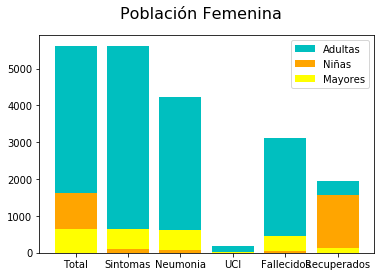

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Población Femenina', fontsize=16)


ax.bar('Total',len(adultos_femenino),label='Adultas',color='c')
ax.bar('Total',len(niños_femenino),label='Niñas',color='orange')
ax.bar('Total',len(mayores_femenino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_femenino),color='c')
ax.bar('Sintomas',len(mayores_femenino),color='yellow')
ax.bar('Sintomas',len(niños_femenino_sintomas),color='orange')



ax.bar('Neumonia',len(adultos_femeninos_nuemonia),color='c')
ax.bar('Neumonia',len(mayores_femeninos_nuemonia),color='yellow')
ax.bar('Neumonia',len(niños_femenino_nuemonia),color='orange')


ax.bar('UCI',len(adultos_femeninos_cuidados),color='c')
ax.bar('UCI',len(mayores_femeninos_cuidados),color='yellow')
ax.bar('UCI',len(niños_femenino_cuidados),color='orange')


ax.bar('Fallecidos',len(adultos_femeninos_fallecidos),color='c')
ax.bar('Fallecidos',len(mayores_femeninos_fallecidos),color='yellow')
ax.bar('Fallecidos',len(niños_femenino_fallecidos),color='orange')

ax.bar('Recuperados',len(adultos_femeninos_recuperados),color='c')
ax.bar('Recuperados',len(niños_femenino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_femeninos_recuperados),color='yellow')


ax.legend()

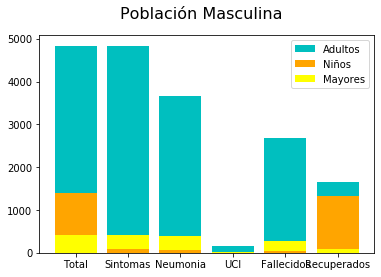

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Población Masculina', fontsize=16)


ax.bar('Total',len(adultos_masculino),label='Adultos',color='c')
ax.bar('Total',len(niños_masculino),label='Niños',color='orange')
ax.bar('Total',len(mayores_masculino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_masculino),color='c')
ax.bar('Sintomas',len(mayores_masculino),color='yellow')
ax.bar('Sintomas',len(niños_masculino_sintomas),color='orange')


ax.bar('Neumonia',len(adultos_masculino_nuemonia),color='c')
ax.bar('Neumonia',len(mayores_masculino_nuemonia),color='yellow')
ax.bar('Neumonia',len(niños_masculino_nuemonia),color='orange')


ax.bar('UCI',len(adultos_masculino_cuidados),color='c')
ax.bar('UCI',len(mayores_masculino_cuidados),color='yellow')
ax.bar('UCI',len(niños_masculino_cuidados),color='orange')


ax.bar('Fallecidos',len(adultos_masculino_fallecidos),color='c')
ax.bar('Fallecidos',len(mayores_masculino_fallecidos),color='yellow')
ax.bar('Fallecidos',len(niños_masculino_fallecidos),color='orange')


ax.bar('Recuperados',len(adultos_masculino_recuperados),color='c')
ax.bar('Recuperados',len(niños_masculino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_masculino_recuperados),color='yellow')


ax.legend()

In [6]:
import pandas as pd

resultado=pd.DataFrame(columns=('Total','Sintomas','Neumonia','UCI','Fallecidos','Recuperados'))
resultado.loc[len(resultado)]=[niñosTotal,niñosSintomas,niñosNeumonia,niñosUCI,niñosFallecidos,niñosRecuperados]
resultado=resultado.rename(index={0:'Niños'})

resultado.loc[len(resultado)]=[adultosTotal,adultosSintomas,adultosNeumonia,adultosUCI,adultosFallecidos,adultosRecuperados]
resultado=resultado.rename(index={1:'Adultos'})

resultado.loc[len(resultado)]=[mayoresTotal,mayoresSintomas,mayoresNeumonia,mayoresUCI,mayoresFallecidos,mayoresRecuperados]
resultado=resultado.rename(index={2:'Mayores'})
resultado

,Total,Sintomas,Neumonia,UCI,Fallecidos,Recuperados
Niños,3023,170,130,4,95,2905
Adultos,10460,4839,7897,340,5809,3599
Mayores,1071,423,1006,39,737,200
